# Certificate Reuse Analysis

This notebook analyzes the reuse of TLS certificates among Electrum servers. By clustering servers that share the same certificate fingerprint, we can identify operators that control multiple servers.

## 1. Setup

In [3]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
DATA_DIR = Path("../../data")
sns.set_theme(style="whitegrid")

# --- Load Datasets ---
def load_json_df(file_path):
    try:
        with open(file_path, "r") as f:
            return pd.DataFrame(json.load(f))
    except FileNotFoundError:
        print(f"Warning: {file_path} not found.")
        return pd.DataFrame()

tls_clusters_df = load_json_df(DATA_DIR / "tls_clusters/tls_clusters_fingerprint.json")

## 2. Certificate Reuse Analysis

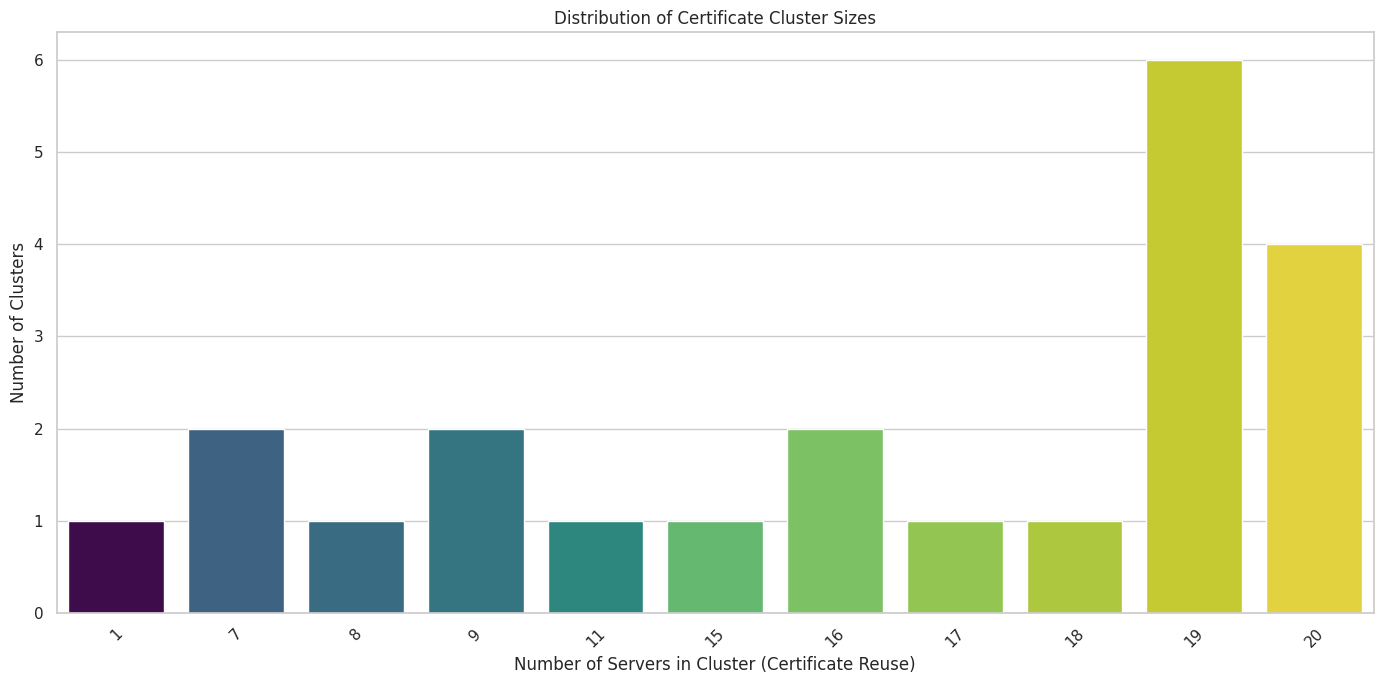

In [4]:
if not tls_clusters_df.empty:
    cluster_sizes = tls_clusters_df['count'].value_counts().sort_index()

    plt.figure(figsize=(14, 7))
    ax = sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, hue=cluster_sizes.index, palette='viridis', legend=False)
    plt.title('Distribution of Certificate Cluster Sizes')
    plt.xlabel('Number of Servers in Cluster (Certificate Reuse)')
    plt.ylabel('Number of Clusters')
    # ax.set_yscale('log')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()